# Ethan Sturek

## Research question/interests

A stroke can be a life changing event for not only the victim, but also for the victim's family and friends. I believe it is important to understand who is at risk for a stroke as my family and I grow older. With this dataset, I aim to uncover what kinds of people are most at risk of suffering from a stroke and answer the following questions:
- What age are people most likely to have a stroke?
- Does gender play a role in suffering a stroke?
- What factors do and do not have an effect on the chances of a stroke?

In [137]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as p1
import os  



df = pd.read_csv("../data/raw/healthcare-dataset-stroke-data.csv")
print (df.head(10))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private    

## EDA

First, let's take a general look at our data.

In [138]:
print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Our data has 5110 entries with 12 columns. Now let's look at specific values of each column to note any strange values.

In [139]:
print(df.nunique(axis=0))
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Everything looks normal except for bmi. I will limit the maximum because 97 bmi is well above the mean of 28 bmi. There are no missing values with the exception being bmi which has 201 missing entries. Now let's look at unique values of columns.

In [140]:
print(df.gender.unique())
print(df.work_type.unique())
print(df.Residence_type.unique())
print(df.smoking_status.unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


The unique values do not overlap with each other and are distinct enough to use. Now we can clean the data as we have confirmed that it will be usable.

### Clean Data

In our case, the only cleaning we have to do is remove the id column as it is not needed in our analysis and take care of the outliers in the bmi column. Also, we will change the ever_married column to 1 or 0 to stay consistent with the rest of data. We could drop the rows that contain null bmi values, but the amount is too low to warrent deletion.

In [141]:
df_cleaned = df.copy().drop(['id'], axis=1)
df_cleaned = df_cleaned[df_cleaned['bmi'].between(5, 60)]
df_cleaned =df_cleaned.replace({'ever_married': {'Yes': 1, 'No': 0}})

This is our cleaned data set

In [142]:
df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


## First Look at Data Relationships

First let's look at stroke victims by age

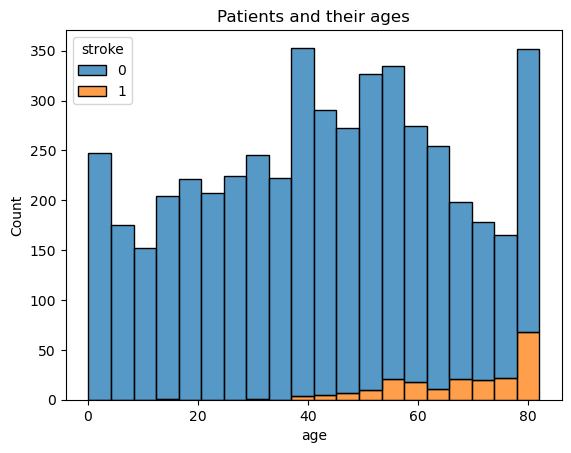

In [143]:
sns.color_palette("hls", 8)
sns.histplot(df_cleaned, x="age", hue="stroke", multiple="stack").set(title= "Patients and their ages")


plt.savefig("folder/Figures/hist1.png")

As we can see, most stroke victims were above the age of 40. Clearly age is a factor with stroke related events, but it could be other health related factors that come with later age. Let's now look at the relation between bmi and age. We'll split up our dataset into non-stroke victims and stroke victims to make visualization a bit easier.

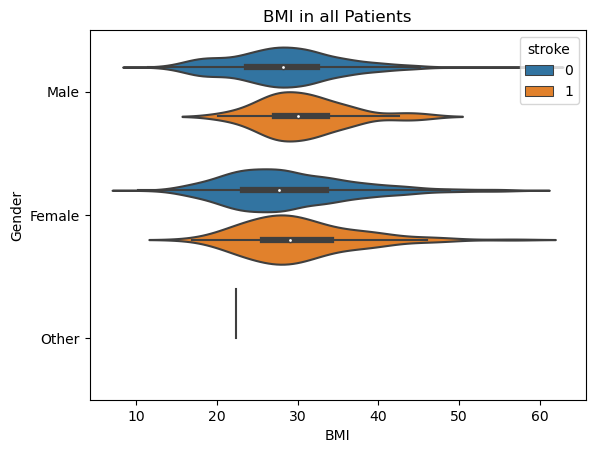

In [144]:
stroke_vic = df_cleaned[df_cleaned["stroke"] == 1]
nonstroke = df_cleaned[df_cleaned["stroke"] == 0]


sns.violinplot(df_cleaned, x= "bmi", y="gender", hue="stroke").set(title="BMI in all Patients", xlabel="BMI", ylabel="Gender")
plt.savefig("folder/Figures/vio1.png")

Judging from the median values on this violin plot, stroke victims tended to have a higher bmi than their non-stroke counterparts.

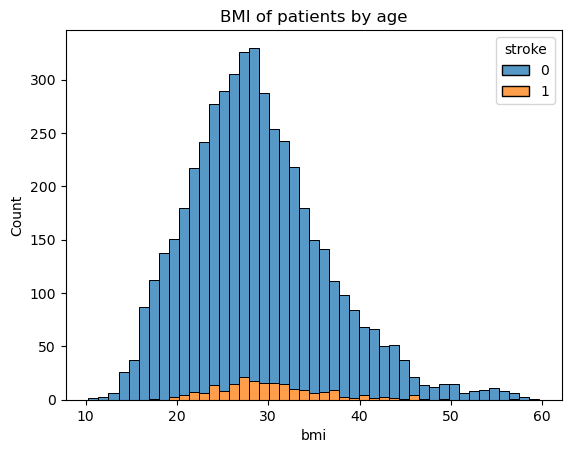

In [145]:
sns.histplot(df_cleaned, x="bmi", hue="stroke", multiple="stack").set(title = "BMI of patients by age")
plt.savefig("folder/Figures/hist2.png")

Most stroke cases seem to happen around the 30 bmi mark which is considered to be on the cusp of obesity. I would have expected more cases in the obese to severely obese range. Let's see what the effect of glucose level has.

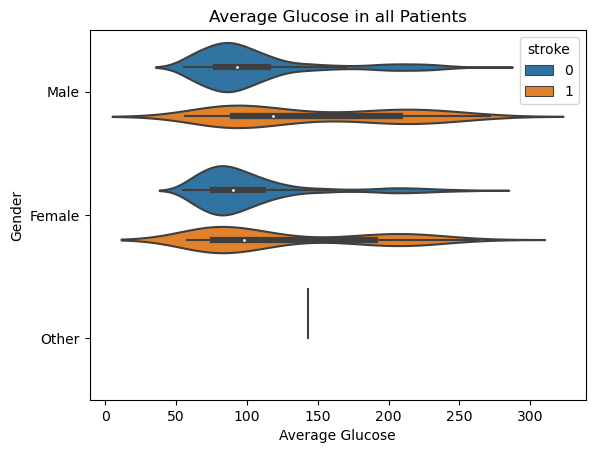

In [146]:

sns.violinplot(df_cleaned, x= "avg_glucose_level", y="gender", hue="stroke").set(title="Average Glucose in all Patients", xlabel="Average Glucose", ylabel="Gender")
plt.savefig("folder/Figures/vio2.png")

For glucose, both male and female victims median glucose levels were higher than non-stroke patients. The disparity is much greater for males than females. 

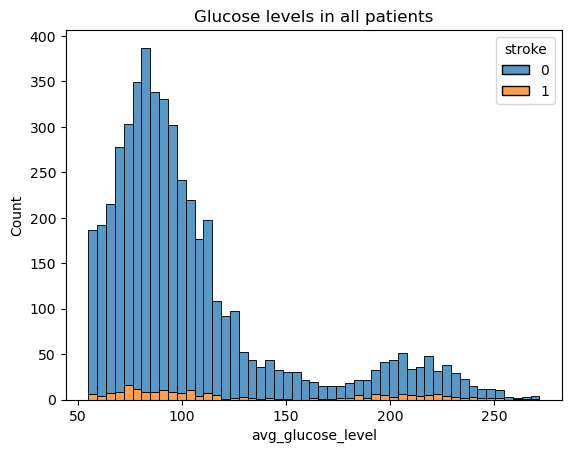

In [147]:
sns.histplot(df_cleaned, x="avg_glucose_level", hue="stroke", multiple="stack").set(title = "Glucose levels in all patients")
plt.savefig("folder/Figures/hist3.png")

Another interesting distribution. Most cases happened in the normal range of glucose levels and taper off as it enters the prediabetic levels and into the diabetic levels around the 150 mark. It then spikes again as it approaches the 200 mark. It seems that people without diabetes are just at risk of a stroke as those with diabetes.

## Analysis Pipline
### Step 1: Load data
- Load data into jupyter notebook
### Step 2: Clean data
- Start by becoming familiar with the general shape and structure of the data
- Check for null values
- Look at all columns min and max values to make sure nothing is absurdly out of range
- Look at unique values and make sure there isn't any overlap or incorrect values
- Remove unneeded columns
- Remove null rows if there are too many
- Set value limits to get rid of outliers
- Change / merge any values that are too similar to one another
### Step 3: Visualize data
- Find relationships in different data points

## Method Chaining

In [148]:
df_clean = p1.load_and_process("../data/raw/healthcare-dataset-stroke-data.csv")


os.makedirs('folder/subfolder', exist_ok=True)  
df_clean.to_csv('folder/subfolder/df.csv',index=False) 

df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


Our method chain now loads and processes the data correctly

## Analysis

As previously mentioned in our EDA, there is a strong correlation between age and strokes. Let's find what age is most susceptible.

The youngest person to have a stroke was 14.0 years old
The oldest person to have a stroke was 82.0 years old
The average age to have a stroke was 67.7 years old


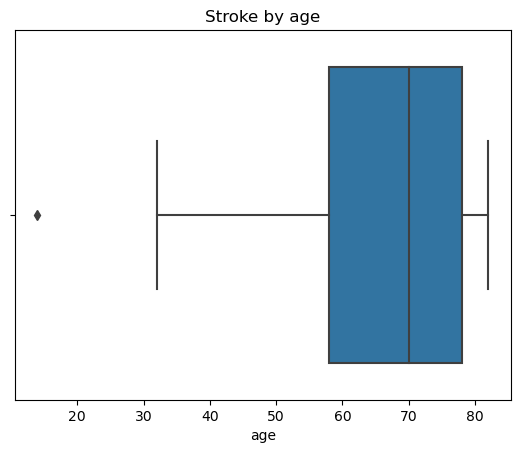

In [149]:
stroke_vic = df_clean[df_clean["stroke"] == 1]
nonstroke = df_clean[df_clean["stroke"] == 0]

stroke_vic.to_csv('folder/subfolder/stroke_vic.csv',index=False)  

min = stroke_vic["age"].min()
max = stroke_vic["age"].max()
mean = stroke_vic["age"].mean()


sns.boxplot(stroke_vic, x="age").set(title="Stroke by age")
print(f"The youngest person to have a stroke was {min} years old")
print(f"The oldest person to have a stroke was {max} years old")
print(f"The average age to have a stroke was {mean:.1f} years old")

plt.savefig("folder/Figures/whisk1.png")

Our data tells us that the age for having a stroke is most likely to occur in the person's late sixties, but can also occur in younger people as well.

The lowest bmi to have a stroke was 16.9
The highest bmi to have a stroke was 56.6
The average bmi to have a stroke was 30.5


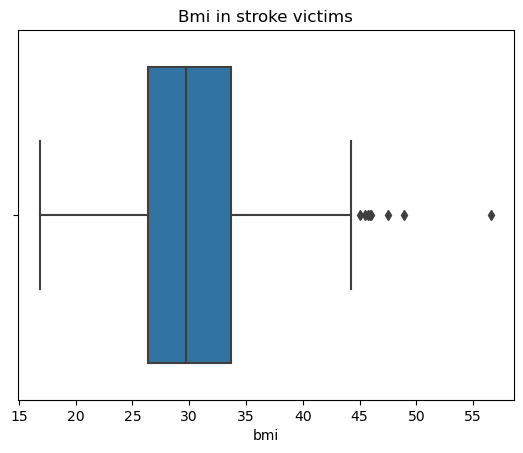

In [150]:
min = stroke_vic["bmi"].min()
max = stroke_vic["bmi"].max()
mean = stroke_vic["bmi"].mean()


sns.boxplot(stroke_vic, x="bmi").set(title="Bmi in stroke victims")
print(f"The lowest bmi to have a stroke was {min}")
print(f"The highest bmi to have a stroke was {max}")
print(f"The average bmi to have a stroke was {mean:.1f}")
plt.savefig("folder/Figures/whisk2.png")

For bmi, the average is 30.5 which is considered obese.

The lowest glucose level to have a stroke was 56.11
The highest glucose level to have a stroke was 271.74
The average glucose level to have a stroke was 134.6


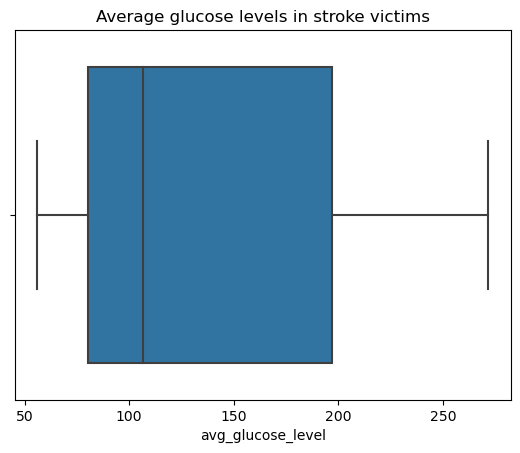

In [151]:
min = stroke_vic["avg_glucose_level"].min()
max = stroke_vic["avg_glucose_level"].max()
mean = stroke_vic["avg_glucose_level"].mean()


sns.boxplot(stroke_vic, x="avg_glucose_level").set(title="Average glucose levels in stroke victims")
print(f"The lowest glucose level to have a stroke was {min}")
print(f"The highest glucose level to have a stroke was {max}")
print(f"The average glucose level to have a stroke was {mean:.1f}")

plt.savefig("folder/Figures/whisk3.png")

In average glucose level, we have an average of 134.6 which is considered diabetic. Now, I would like to find out what type of person is most likely to have a stroke. We will create a fictional person at the end with all the attributes that increase the likelihood of a stroke. First, let's find out if females or males are more likely to have a stroke.

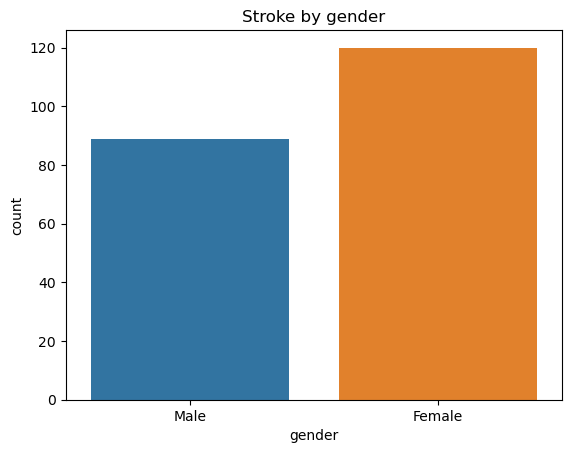

In [152]:
sns.countplot(stroke_vic, x="gender").set(title="Stroke by gender")
plt.savefig("folder/Figures/count1.png")

At first glance it may seem that females are more likely to suffer a stroke, however, we need to compare this figure with the total number of people in the dataset to get the full picture.

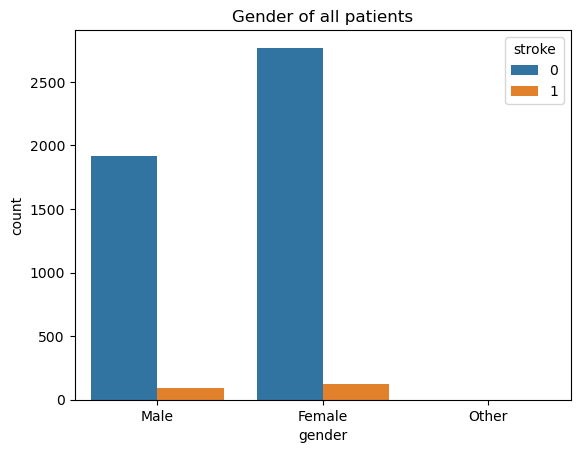

In [153]:
sns.countplot(df_clean, x="gender", hue="stroke").set(title="Gender of all patients")
plt.savefig("folder/Figures/count2.png")

In [154]:
per = p1.percentage(df_clean, stroke_vic, "gender", "Male")
print(f"{per:.2f}% of males hade a stroke")
per = p1.percentage(df_clean, stroke_vic, "gender", "Female")
print(f"{per:.2f}% of females had a stroke")

4.43% of males hade a stroke
4.16% of females had a stroke


When compared to the total of all patients, the percentage of male victims was actually slightly higher. Both percentages are very close so it's tough to say whether gender plays a role.

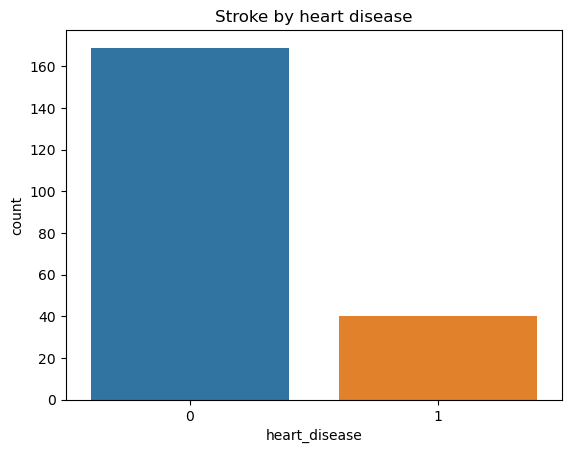

In [155]:
person_stats = {
    "Male": male
    }
sns.countplot(stroke_vic, x="heart_disease").set(title="Stroke by heart disease")
plt.savefig("folder/Figures/count2.png")

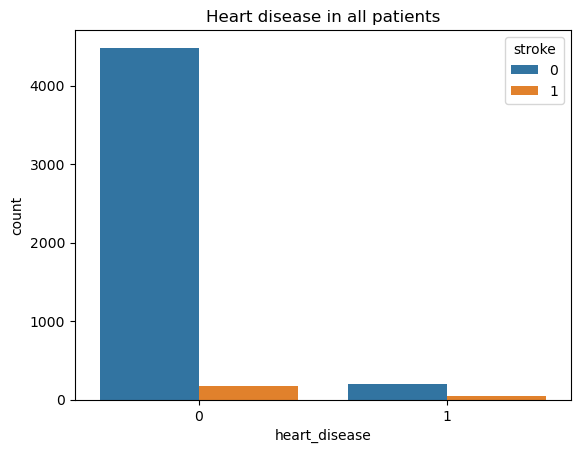

In [156]:
sns.countplot(df_clean, x="heart_disease", hue="stroke").set(title="Heart disease in all patients")
plt.savefig("folder/Figures/count3.png")

In [157]:
heart = p1.percentage(df_clean, stroke_vic,"heart_disease", 1)
noheart = p1.percentage(df_clean, stroke_vic,"heart_disease", 0)
print(f"{heart:.2f}% of people with heart disease had a stroke")
print(f"{noheart:.2f}% of people with heart disease had a stroke")


16.46% of people with heart disease had a stroke
3.63% of people with heart disease had a stroke


At first glance, it looks as though heart disease does not play a significant role in strokes, but when we compare the amount of strokes in each category, it's clear that people with heart disease are much more likely to have a stroke.

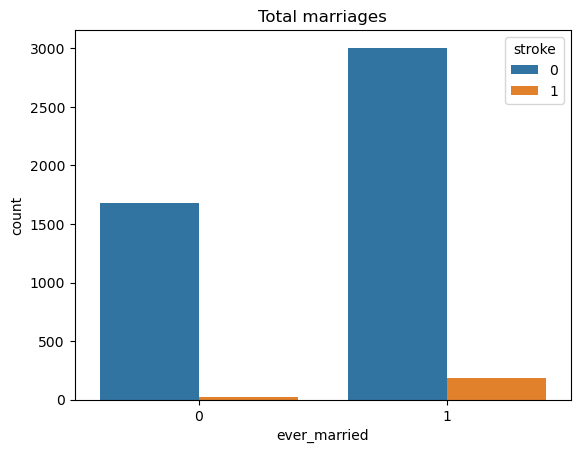

In [158]:
person_stats.update({"Heart Disease": heart})
    
sns.countplot(df_clean, x="ever_married", hue="stroke").set(title="Total marriages")
plt.savefig("folder/Figures/count4.png")

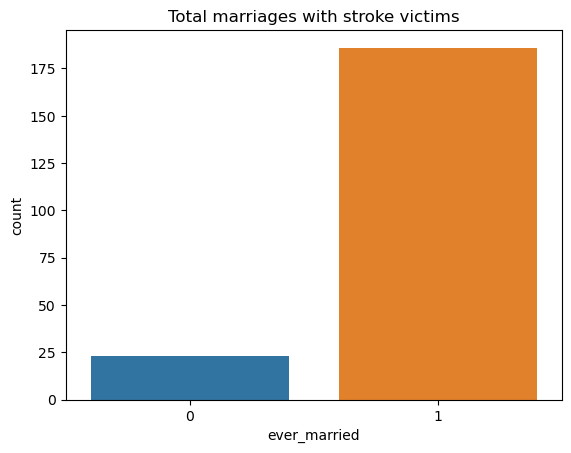

In [159]:
sns.countplot(stroke_vic, x="ever_married").set(title="Total marriages with stroke victims")
plt.savefig("folder/Figures/count5.png")

In [160]:
married = p1.percentage(df_clean, stroke_vic,"ever_married", 1)
notmarried = p1.percentage(df_clean, stroke_vic,"ever_married", 0)
print(f"{married:.2f}% of married people had a stroke")
print(f"{notmarried:.2f}% of non-married people had a stroke")


5.83% of married people had a stroke
1.35% of non-married people had a stroke


It seems that being married increases the likelihood of a stroke.

13.45% of people with hypertension had a stroke
3.35% of people without hypertension had a stroke


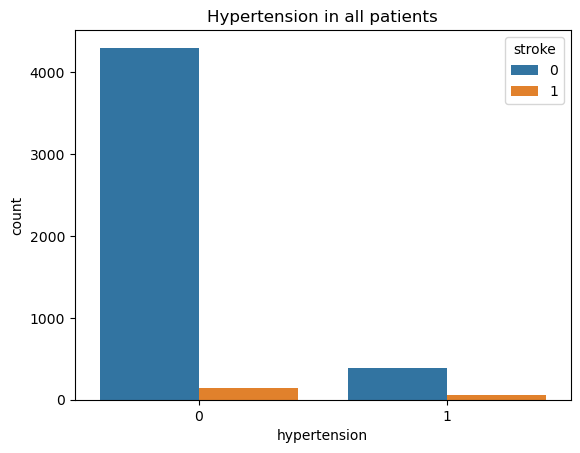

In [161]:
person_stats.update({"Marriage": married})
hype= p1.percentage(df_clean, stroke_vic,"hypertension", 1)
nohype = p1.percentage(df_clean, stroke_vic,"hypertension", 0)
print(f"{hype:.2f}% of people with hypertension had a stroke")
print(f"{nohype:.2f}% of people without hypertension had a stroke")
sns.countplot(df_clean, x="hypertension", hue="stroke").set(title="Hypertension in all patients")
plt.savefig("folder/Figures/count6.png")

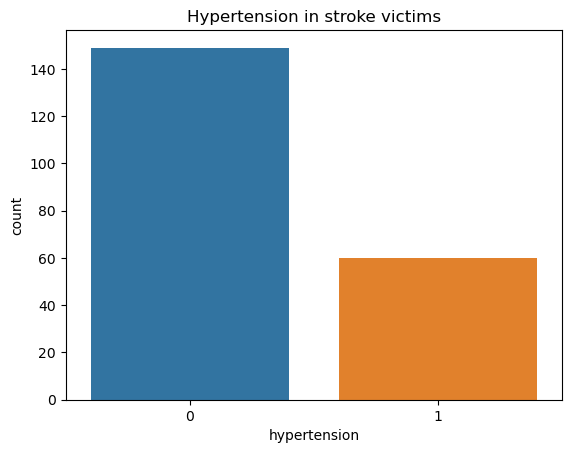

In [162]:
sns.countplot(stroke_vic, x="hypertension").set(title="Hypertension in stroke victims")
plt.savefig("folder/Figures/count7.png")

The number of stroke victims with hypertension is much lower, but again, when compared to the total amount of patients the percentage of people that had a stroke with hypertension is much higher

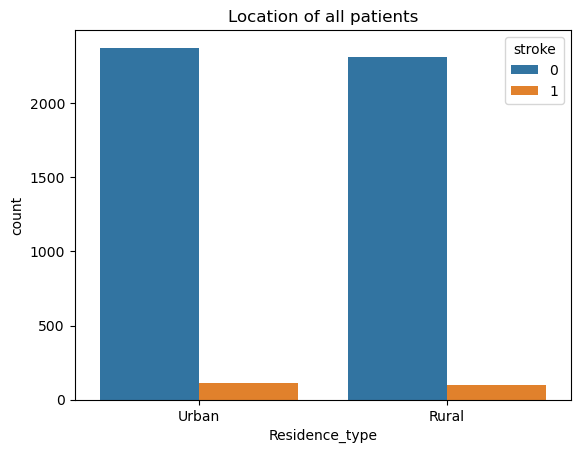

In [163]:
person_stats.update({"Hypertension": hype})
sns.countplot(df_clean, x="Residence_type", hue="stroke").set(title="Location of all patients")
plt.savefig("folder/Figures/count8.png")

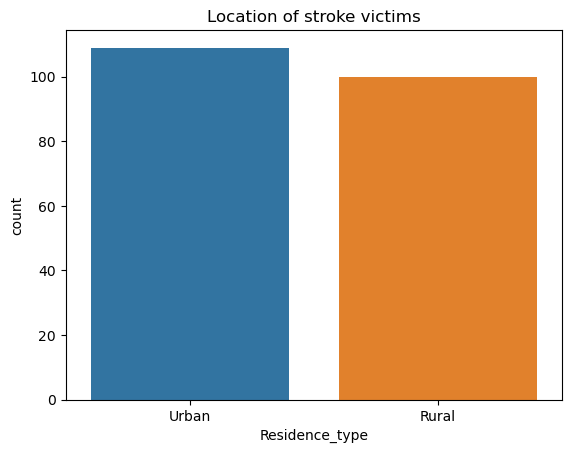

In [164]:
sns.countplot(stroke_vic, x="Residence_type").set(title="Location of stroke victims")
plt.savefig("folder/Figures/count9.png")

In [165]:
urban = p1.percentage(df_clean, stroke_vic,"Residence_type", "Urban")
rural = p1.percentage(df_clean, stroke_vic,"Residence_type", "Rural")
print(f"{urban:.2f}% of people living in an urban place had a stroke")
print(f"{rural:.2f}% of people living in a rural place had a stroke")

4.39% of people living in an urban place had a stroke
4.15% of people living in a rural place had a stroke


The data is pretty even on these two locations, but urban is slightly higher.

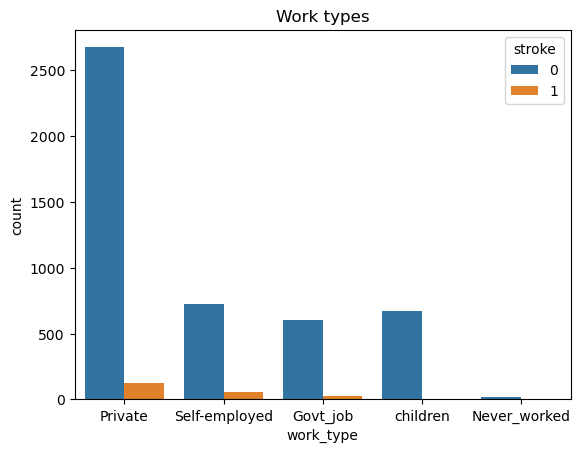

In [166]:
person_stats.update({"Urban": urban})
sns.countplot(df_clean, x="work_type", hue="stroke").set(title="Work types")
plt.savefig("folder/Figures/count10.png")

In [167]:

priv = p1.percentage(df_clean, stroke_vic,"work_type", "Private")
selfemp = p1.percentage(df_clean, stroke_vic,"work_type", "Self-employed")
gov = p1.percentage(df_clean, stroke_vic,"work_type", "Govt_job")
children = p1.percentage(df_clean, stroke_vic,"work_type", "children")
never = p1.percentage(df_clean, stroke_vic,"work_type", "Never_worked")

print(f"{priv:.2f}% of people working a private job had a stroke")
print(f"{selfemp:.2f}% of people self employed had a stroke")
print(f"{gov:.2f}% of people working a government job had a stroke")
print(f"{children:.2f}% of children had a stroke")
print(f"{never:.2f}% of people that have never worked had a stroke")


4.54% of people working a private job had a stroke
6.85% of people self employed had a stroke
4.44% of people working a government job had a stroke
0.15% of children had a stroke
0.00% of people that have never worked had a stroke


Out of all job positions, self-employed has the highest risk of stroke.

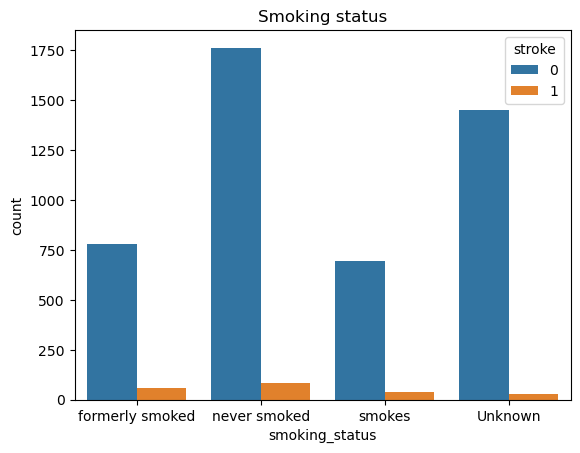

In [168]:
person_stats.update({"Self-employed": selfemp})
sns.countplot(df_clean, x="smoking_status", hue="stroke").set(title="Smoking status")
plt.savefig("folder/Figures/count11.png")

In [169]:
fsmoke = p1.percentage(df_clean, stroke_vic,"smoking_status", "formerly smoked")
nsmoke = p1.percentage(df_clean, stroke_vic,"smoking_status", "never smoked")
smoke = p1.percentage(df_clean, stroke_vic,"smoking_status", "smokes")
unknown = p1.percentage(df_clean, stroke_vic,"smoking_status", "Unknown")

print(f"{fsmoke:.2f}% of people that have formerly smoked had stroke")
print(f"{nsmoke:.2f}% of people that have never smoked had a stroke")
print(f"{smoke:.2f}% of people that currently smokes had a stroke")
print(f"{unknown:.2f}% of people with an unknown status had a stroke")

6.81% of people that have formerly smoked had stroke
4.55% of people that have never smoked had a stroke
5.32% of people that currently smokes had a stroke
1.96% of people with an unknown status had a stroke


Surprisingly, people that previously smoked have a higher chance than people that currently smoke. 

In [170]:
person_stats.update({"Formerly smoked": fsmoke})

Now that we have identified the leading causes, we will plot them and then create our fictional person.

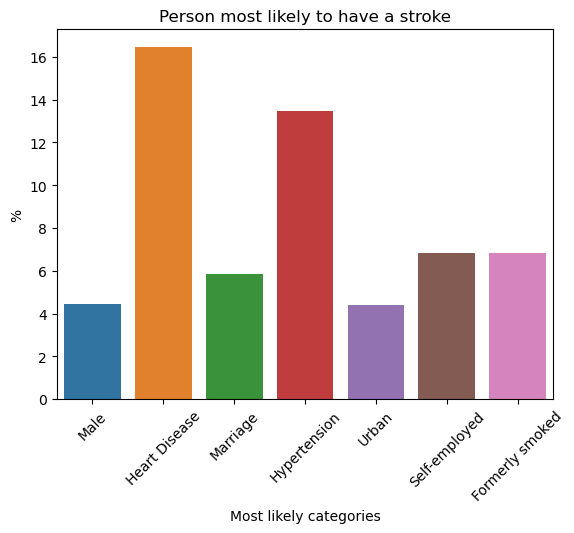

In [171]:
my_df = pd.DataFrame(person_stats.items())
df_clean.to_csv('folder/subfolder/most_likely.csv',index=False) 
ax = sns.barplot(x=0, y=1, data=my_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel = 'Most likely categories', ylabel='%', title='Person most likely to have a stroke')
plt.savefig("folder/Figures/bar1.png",bbox_inches = "tight")

## Prime Target for a Stroke:

Jim is a 68 year old obese man. He owns his own bakery, but can't eat most of what he bakes due to his diabetes. Jim and his loving wife have lived in Vancouver all their lives. Jim used to smoke, but his doctor recommended that he should quit due to his hypertension.

## Conclusion

Through my analysis of our dataset, I have come to the conclusion that people in their late 60s that are obese and have diabetes are most at risk of a stroke. Additional risk factors include being males with heart disease, being married, having hypertension, living in an urban location, being self-employed and formerly smoking. This is actually quite concerning as my father falls into most of these categories. I'll be sure to show him this data and discuss how we can lessen the risk of a stroke.